In [1]:
import keras
keras.__version__

'2.8.0'

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
  دسته‌بندی نظرات کاربران در مورد فیلم‌ها: مثال دسته‌بندی دودویی 
  <br><br>
  <font size="+1" face="homa">
  فصل ۳ قسمت ۵ 
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
دسته‌بندی دو کلاسی یا دودویی احتمالاً پرکاربردترین مسئله یادگیری ماشین است. در این مثال، دسته‌بندی نظرات کاربران در دو گروه نظر مثبت یا منفی را فرا خواهید گرفت. 
<br>
  <b>
مجموعه ‌داده IMDB
  </b>
<br>
در این مثال با مجموعه ‌داده IMDB کار خواهیم کرد که مجموعه‌ای از 50 هزار نظر منفی یا مثبت از پایگاه داده IMDB است. این مجموعه به 25 هزار نظر برای آموزش و 25 هزار نظر برای آزمایش تقسیم شده است و هر مجموعه حاوی 50 درصد نظر مثبت و 50 درصد نظر منفی است.
<br>
 دلیل استفاده از مجموعه‌های جداگانه آموزش و آزمایش چیست؟ چون هرگز نباید برای بررسی کارایی یک مدل یادگیری ماشین از داده‌هایی استفاده کنید که قبلاً توسط آن‌ها آموزش انجام ‌شده است! چراکه عملکرد خوب یک مدل روی داده‌های آموزش‌دیده لزوماً بدین معنی نیست که روی داده‌هایی که هرگز ندیده است نیز همین عملکرد را خواهد داشت و از طرفی آنچه مهم است عملکرد خوب مدل روی داده‌های جدید است. (واضح است که ما برچسب داده‌های آموزشی را داریم و نیازی نیست که مدل آن‌ها را پیش‌بینی کند). به عنوان مثال، این احتمال وجود دارد که مدل تنها نگاشت بین نمونه‌های آموزشی و خروجی متناظر با آن‌ها را به خاطر سپرده باشد، در این صورت نخواهد توانست خروجی مورد انتظار داده‌هایی را که هرگز ندیده است پیش‌بینی کند. در فصل بعدی، این نکته را با جزییات بیشتری توضیح خواهیم داد.
 <br>
مجموعه ‌داده IMDB هم مثل مجموعه ‌داده MNIST، در پکیج کراس  موجود بوده و از قبل پیش‌پردازش شده است: نظرات (دنباله از کلمات) به دنباله‌ای از اعداد صحیح تبدیل‌شده‌اند که در آن هر عدد صحیح نشان‌گر یک کلمه بخصوص در لغت‌نامه است.
<br>
کد زیر، مجموعه ‌داده را بارگذاری خواهد کرد (زمانی که برای اولین بار آن‌ها را اجرا می‌کنید، حدود 80 مگابایت (MB) از داده‌ها از وب روی کامپیوتر شما دانلود خواهد شد).


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<p dir="rtl" align="justify">
<font face="homa">
آرگومان num_words=10000 به این معنی است که فقط از ده هزار کلمه‌ای که فراوانی تکرار آن‌ها بیشتر است در داده‌های آموزشی استفاده شده و کلمات نادر حذف می‌شوند. بدین ترتیب، مصرف حافظه داده‌های برداری مورد استفاده از حد مشخصی فراتر نخواهد رفت.
<br><br>
متغیرهای train_data و test_data لیست نظرات هستند؛ هر نظر در حقیقت لیستی از اندیس کلمات است (و از این طریق دنباله‌ای از کلمات را کدگذاری می‌کنند). train_labels و test_labels لیست‌هایی از 0 و 1 هستند که در آن 0 نمود نظر منفی و 1 نمود نظر مثبت است:

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

<p dir="rtl" align="justify">
<font face="homa">
از آنجایی ‌که مجموعه ‌داده را به 10 هزار کلمه پرتکرار محدود کردیم، هیچ‌کدام از اندیس‌های کلمه بزرگ‌تر از 10 هزار نخواهند بود:
<br><br>


In [5]:
max([max(sequence) for sequence in train_data])

9999

<p dir="rtl" align="justify">
<font face="homa">
برای فهم بیشتر، در ادامه نحوه کدگشایی سریع یکی از این نظرات و تبدیل آن به کلمات انگلیسی را نشان داده‌ایم:
<br><br>


In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 1s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
آماده‌سازی داده‌ها 
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
ورودی شبکه عصبی نمی‌تواند از نوع لیست باشد؛ در نتیجه لیست‌های ورودی باید به تنسور تبدیل شوند. دو روش برای انجام این کار وجود دارد:
<br>
*	 یکسان‌سازی طول لیست‌ها با استفاده از پدینگ، تبدیل آن‌ها را به تنسوری از اعداد صحیح با شکل (samples, word_indices) و در انتها طراحی لایه اول شبکه به گونه‌ای که توانایی دریافت چنین تنسوری از اعداد صحیح را داشته باشد. (لایه Embedding که در این کتاب به طور تفصیلی توضیح داده خواهد شد).
<br>
*	 کدگذاری لیست‌ها به صورت تک-یک  تا به بردارهای متشکل از 0 و 1 تغییر یابند؛ یعنی، به عنوان مثال، تغییر دنباله [3, 5] به بردارهای ده هزار بعدی که همه آن‌ها 0 هستند، به‌استثنای اندیس‌های 3 و 5 که ۱ خواهند بود. بدین ترتیب، می‌توان یک‌لایه متراکم را به عنوان اولین لایه شبکه به کار برد که قابلیت کار روی داده‌های برداری از نوع float  را دارد.
 <br>
حال، با استفاده از راه‌حل دوم می‌خواهیم داده‌ها را برداری کنیم که برای وضوح بیشتر، الگوریتم کدگذاری را به صورت دستی انجام می‌دهیم و از کدهای آماده استفاده نمی‌کنیم.


In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

<p dir="rtl" align="justify">
<font face="homa">
نمونه‌ها اکنون به صورت زیر هستند:
<br><br>


In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

<p dir="rtl" align="justify">
<font face="homa">
همچنین باید برچسب‌ها را به صورت برداری تبدیل کنیم که به راحتی قابل انجام است:
<br><br>

In [10]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<p dir="rtl" align="justify">
<font face="homa">
حالا داده‌ها برای وارد کردن به شبکه عصبی آماده هستند.
<br><br>

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
ساخت شبکه
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
نمونه‌های ورودی، بردار و برچسب‌ها، اسکالر هستند (1s و 0s): این ساده‌ترین مثال ممکن است. نوع شبکه‌ای که روی چنین مسئله‌ای خوب عمل می‌کند، دنباله‌ای از لایه‌های تمام متصل (Dense) با فعال‌سازی‌های relu است:
<br>
 Dense(16, activation='relu').
<br>
آرگومانی که در هنگام تعریف هر لایه متراکم (Dense) مشخص می‌شود (در اینجا عدد 16) تعداد واحدهای پنهان آن لایه است. هر واحد پنهان یک بعد در فضای بازنمایی لایه است. از فصل دو به خاطر دارید که هر لایه Dense با فعال‌سازی relu عملیات‌ تنسوری زیر را پیاده‌سازی می‌کند:
<br>
output = relu(dot(W, input) + b)
<br>
داشتن 16 واحد پنهان به معنای ماتریس وزن W با شکل (input_dimension, 16) است: ضرب نقطه‌ای با W، نمونه‌های ورودی را به فضای بازنمایی شده 16 بعدی نگاشت می¬کند (سپس، بردار بایاس b به نتیجه اضافه شده و عملیات relu روی نتیجه اعمال می‌شود). وابستگی فضای بازنمایی به تعداد بعد مشخص‌شده را می‌توانید با این پرسش که «هنگام یادگیری بازنمایی‌ها، چقدر به شبکه آزادی عمل می‌دهید»، درک کنید. داشتن واحدهای پنهان بیشتر (فضای بازنمایی با ابعاد بزرگ‌تر) به شبکه این امکان را می‌دهد که بازنمایی پیچیده‌تری را یاد بگیرد؛ اما از نظر محاسباتی شبکه را بسیار پرهزینه می‌کند و ممکن است به یادگیری الگوهای ناخواسته منجر شود (الگوهایی که کارایی شبکه را روی داده‌های آموزشی بهبود می‌دهد اما تأثیری روی داده‌های آزمایش نخواهد داشت).
 <br>
در خصوص نحوه چینش لایه‌های Dense دو مسئله مهم وجود دارد:
 <br>
*	تعداد لایه‌های مورد استفاده
 <br>
*	انتخاب تعداد واحدهای پنهان برای هر لایه
 <br>
در فصل 4، اصول لازم برای اتخاذ این تصمیم‌ها را یاد خواهید گرفت: در حال حاضر، باید در انتخاب معماری از روش زیر استفاده 
کنید:
 <br>
*	دو لایه میانی که هرکدام 16 واحد پنهان دارند
 <br>
*	لایه سوم که خروجی آن یک اسکالر است و مشخص‌ کننده پیش‌بینی شبکه از منفی یا مثبت بودن نظر دریافتی است. لایه‌های میانی از relu به عنوان تابع فعال‌سازی استفاده خواهند کرد و لایه نهایی از فعال‌سازی سیگموید  استفاده خواهد کرد تا یک احتمال را به عنوان خروجی تولید کند (عددی بین 0 و 1 که نشان می‌دهد میزان احتمال «1» بودن خروجی این نمونه چقدر است: یا به عبارتی چقدر احتمال دارد که نظر مثبت باشد). relu (واحد یک‌سویه شده خطی ) تابعی است که مقادیر منفی را صفر می‌کند (شکل 3-4)، در حالی ‌که سیگموید مقادیر ورودی را به‌ بازه [0, 1] می‌برد (شکل 3-5) و به همین دلیل به صورت یک خروجی احتمالی قابل تفسیر است.



<p dir="rtl" align="justify">
<font face="homa">
نمای کلی شبکه را نشان می‌دهد. 
<br><br>

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

<p dir="rtl" align="justify">
<font face="homa">
در ادامه کد پیاده‌سازی شبکه فوق در کراس ارائه ‌شده است که مشابه با مثال MNIST است.
<br><br>

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<p dir="rtl" align="justify">
<font face="homa">
در گام آخر، باید یک تابع هزینه و یک بهینه‌ساز انتخاب شود. از آنجا‌ که با یک مسئله دسته‌بندی دودویی روبرو هستیم و خروجی شبکه‌ یک احتمال است (شبکه با یک ‌لایه یک واحدی با فعال‌ساز سیگموید به پایان برده می‌شود)، بهترین کار استفاده از تابع هزینه آنتروپی متقابل دودویی (binary_crossentropy) است. این تابع تنها انتخاب ممکن نیست: به عنوان مثال می‌توان از میانگین مربعات mean_squared_error)) استفاده کنید؛ اما هنگام کار با مدل‌هایی که خروجی آن‌ها به صورت احتمالی است، آنتروپی متقابل بهترین انتخاب است. آنتروپی متقابل کمیتی است که در حوزه نظریه اطلاعات معرفی ‌شده و فاصله بین توزیع‌های احتمال را اندازه می‌گیرد؛ یا در این مورد، فاصله بین توزیع برچسب‌های حقیقی و پیش‌بینی‌های شما را می‌سنجد.
<br>
در ادامه مرحله پیکربندی مدل با بهینه‌ساز rmsprop و تابع هزینه binary_crossentropy آمده است. توجه داشته باشید که در طول آموزش معیار دقت نیز گزارش داده می‌شود.
<br>

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<p dir="rtl" align="justify">
<font face="homa">
علت اینکه می‌توان بهینه‌ساز، تابع هزینه و معیار‌ها را به عنوان رشته تعریف کرد، این است که rmsprop, binary_crossentropy و accuracy بخشی از پکیج کراس هستند. گاهی ممکن است بخواهید پارامترهای بهینه‌ساز را پیکربندی کنید یا یک تابع هزینه سفارشی  را به شبکه معرفی کنید. همان‌طور که در نمونه کد 3-5 نشان داده شده است، مورد اول را می‌توانید با انتخاب کلاس بهینه‌ساز و ارسال آن در قالب آرگومان optimizer انجام دهید. 
<br>


In [14]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


<p dir="rtl" align="justify">
<font face="homa">
. مورد دوم، یعنی ارسال تابع هزینه و معیار سفارشی با مشخص کردن تابع مورد نظر در قالب آرگومان‌ loss و یا metrics قابل انجام است؛ این مورد نیز در نمونه کد 3-6 نشان داده شده است.
<br>

In [15]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
ارزیابی و اعتبارسنجی راهکار استفاده‌شده
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
در طول آموزش، به ‌منظور کنترل دقت مدل روی داده‌هایی که هرگز ندیده است، با جدا کردن 10 هزار نمونه از داده‌های آموزشی اصلی، یک مجموعه اعتبارسنجی ایجاد خواهیم کرد.
<br>


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

<p dir="rtl" align="justify">
<font face="homa">
حالا مدل را برای 20 تکرار در زیر دسته‌های متشکل از 512 نمونه آموزش خواهیم داد (20 تکرار روی همه نمونه‌ها در تنسورهای x_train و y_train). در عین ‌حال، خطا و دقت 10 هزار نمونه‌ای نیز گزارش خواهد شد. برای داشتن چنین گزارشی، داده‌های اعتبارسنجی به عنوان آرگومان validation_data ارسال می‌شود.
<br>

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5155 - binary_accuracy: 0.7892 - val_loss: 0.3891 - val_binary_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3093 - binary_accuracy: 0.9003 - val_loss: 0.3245 - val_binary_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2252 - binary_accuracy: 0.9275 - val_loss: 0.2777 - val_binary_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1774 - binary_accuracy: 0.9422 - val_loss: 0.2726 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1426 - binary_accuracy: 0.9544 - val_loss: 0.2789 - val_binary_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1174 - binary_accuracy: 0.9635 - val_loss: 0.2955 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - los

<p dir="rtl" align="justify">
<font face="homa">
با استفاده از CPU، این کار کمتر از 2 ثانیه برای هر تکرار طول خواهد کشید (آموزش در طول 20 ثانیه تمام خواهد شد). در پایان هر تکرار، وقفه کوتاهی برای محاسبه دقت روی ده هزار نمونه اعتبارسنجی به وجود خواهد آمد.
<br>
توجه داشته باشید که فراخواندن model.fit() شی‌ء history را بازمی‌گرداند. این شیء عضوی به نام history دارد که از نوع دیکشنری در پایتون است و حاوی همه اتفاقاتی است که در طول آموزش رخ داده است. محتویات این دیکشنری در زیر آمده است:

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

<p dir="rtl" align="justify">
<font face="homa">
دیکشنری، حاوی 4 بخش است که برای هر معیاری که در طول آموزش و اعتبارسنجی گزارش می‌شود یک بخش در نظر گرفته شده است. در دو نمونه کد زیر برای رسم نمودار خطای اعتبارسنجی و آموزش در کنار همدیگر (شکل 3-7) و نیز دقت اعتبارسنجی و آموزش از Matplotlib استفاده می‌کنیم.

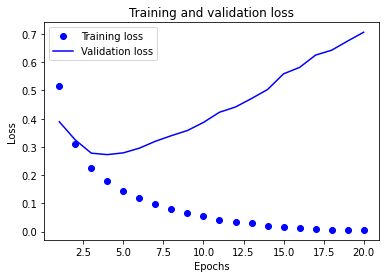

In [20]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

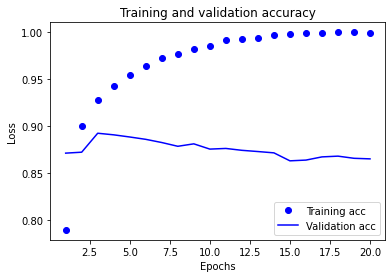

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<p dir="rtl" align="justify">
<font face="homa">
همان‌طور که مشاهده می‌کنید، خطای آموزش با هر تکرار کاهش ‌یافته و دقت آن با هر تکرار افزایش می‌یابد. این همان چیزی است که هنگام اجرای بهینه‌سازی گرادیان نزولی انتظارش را داریم. کمیتی که سعی داریم آن را به حداقل برسانیم باید پس از هر تکرار کمتر شود؛ اما در مورد دقت و خطای اعتبارسنجی این‌طور نیست: در تکرار چهارم این مقادیر در خلاف جهت بهبود پیش رفته‌اند. این همان مشکلی است که قبلاً در مورد آن هشدار داده بودیم: مدلی که روی داده‌های آموزشی کارایی خوبی دارد، ضرورتاً در داده‌هایی که هرگز ندیده است عملکرد خوبی نخواهد داشت. به بیان واضح‌تر، چیزی که شاهدش هستید بیشبرازش  است: بعد از تکرار دوم، مدل روی داده‌های آموزشی بیش ‌از حد بهینه می‌شود و نهایتاً بازنمایی‌هایی یاد گرفته می‌شوند که مختص داده‌های آموزشی هستند و به داده‌های خارج از مجموعه آموزشی قابل ‌تعمیم نیستند.
<br>
در این مثال، برای اجتناب از بیش برازش، می‌توانید آموزش را بعد از سه تکرار متوقف کنید. به طور کلی، می‌توان برای مبارزه با بیش‌برازش از شگردهایی استفاده کرد که در فصل 4 به آن‌ها خواهیم پرداخت.
<br>
حال می‌خواهیم شبکه جدیدی را از نو برای 4 تکرار آموزش دهیم و سپس روی داده‌های آزمایش ارزیابی کنیم.


In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 76ms/step - loss: 0.4688 - accuracy: 0.8222
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2731 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2071 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3054 - accuracy: 0.8790


In [24]:
results

[0.3053719401359558, 0.8789600133895874]

<p dir="rtl" align="justify">
<font face="homa">
دقت این راهکار کاملاً ساده 88 درصد است. با روش‌های جدید باید بتوانید به 95 درصد نزدیک شوید.

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
استفاده از شبکه آموزش‌دیده برای پیش‌بینی داده‌های جدید
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
هدف از آموزش یک شبکه استفاده از آن در یک کاربرد است. می‌توان احتمال مثبت بودن نظرات را با استفاده از متد predict پیش‌بینی کرد:
<br>


In [25]:
model.predict(x_test)

array([[0.2800914 ],
       [0.9999199 ],
       [0.97938967],
       ...,
       [0.1465052 ],
       [0.10427454],
       [0.7076094 ]], dtype=float32)

<p dir="rtl" align="justify">
<font face="homa">
همان‌طور که مشاهده می‌کنید، شبکه در مورد برخی از نمونه‌ها مطمئن است (99/0 یا بیشتر، یا 01/0 یا کمتر) اما در مورد برخی دیگر اطمینان کمتری دارد (6/0، 4/0).

<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
آزمایش‌های بیشتر
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
به کمک آزمایش‌های زیر می‌توانید اطمینان حاصل کنید انتخاب‌هایی که در مورد معماری شبکه اتخاذ کرده‌اید همگی معقول هستند، با این وجود برخی اصلاحات قابل اعمال هستند:
<br>
*	 در این مثال از دو لایه پنهان استفاده شد. یک یا سه لایه پنهان را امتحان کنید و تأثیر آن روی دقت مجموعه‌های آزمایش و اعتبارسنجی بررسی کنید.
<br>
*	لایه‌هایی با واحدهای پنهان بیشتر یا کمتر را امتحان کنید: 32 واحد، 64 واحد و الی‌آخر.
<br>
*	تابع هزینه mse را به‌جای binary_crossentropy امتحان کنید.
<br>
*	فعال‌سازی tanh (فعال‌سازی که در روزهای اولیه شبکه‌های عصبی متداول بود) را به‌جای relu امتحان کنید.


<p dir="rtl" align="right">
<font size="+2" face="homa">
  <b>
جمع‌بندی
  <br><br>
  <font size="+1" face="homa">
  </b>

<hr>

<p dir="rtl" align="justify">
<font face="homa">
مواردی که باید از این مثال بیاموزید به شرح زیر است:
<br>
*	قبل از اینکه داده‌های خام را به‌ عنوان تنسور به شبکه عصبی وارد کنید، باید آن‌ها را پیش‌پردازش کنید. دنباله‌های کلمات را می‌توان به عنوان بردارهای دودویی کدگذاری کرد، اما گزینه‌های کدگذاری دیگری نیز وجود دارند.
<br>
*	دنباله‌ای از لایه‌های Dense با فعال‌سازی‌های relu می‌توانند دامنه گسترده‌ای از مسائل را حل کنند (از جمله دسته‌بندی احساسات) و احتمالاً بارها از آن استفاده خواهید کرد.
<br>
*	در مسئله دسته‌بندی دودویی (دو کلاس خروجی)، شبکه باید با یک‌لایه Dense تک واحدی و تابع فعال‌سازی sigmoid خاتمه یابد: خروجی شبکه باید اسکالری بین 0 و 1 باشد که کدگذاری یک احتمال است.
<br>
*	برای چنین خروجی اسکالری که توسط یک تابع سیگموید روی مسئله دسته‌بندی دودویی تولید شده است، تابع هزینه به کار رفته باید binary_crossentropy باشد.
<br>
*	مسئله هر چیزی باشد، بهینه‌ساز rmsprop اغلب انتخاب خوبی است؛ بنابراین، یکی از نگرانی‌هایتان کم می‌شود.
<br>
*	شبکه‌های عصبی بعد از اینکه روی داده‌های آموزشی به عملکرد خوبی رسیدند، نهایتاً شروع به بیش برازش می‌کنند که موجب می‌شود روی داده‌هایی که قبلاً ندیده‌اند نتایج خیلی بدتری به دست بیاورند. همیشه گزارشی از دقت شبکه روی داده‌هایی که خارج از مجموعه آموزشی هستند در اختیار داشته باشید.
<br>
